In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(style="whitegrid")
sns.set_context('notebook', font_scale=1.0)

# Import the module
import cartopy_grid_plots as cgp

In [3]:
# Open the netCDF dataset
ds = xr.open_dataset('dummy_data/air.2m.gauss.2022.nc')

# Extract the temperature values (converting from Kelvin to Celsius)
var_values = ds['air'].values[:, 0, :, :]-273.15
# Extract the time values and convert to datetime
time = pd.to_datetime(ds['time'].values)
# Extract latitude and longitude values
lat = ds['lat'].values
lon = ds['lon'].values

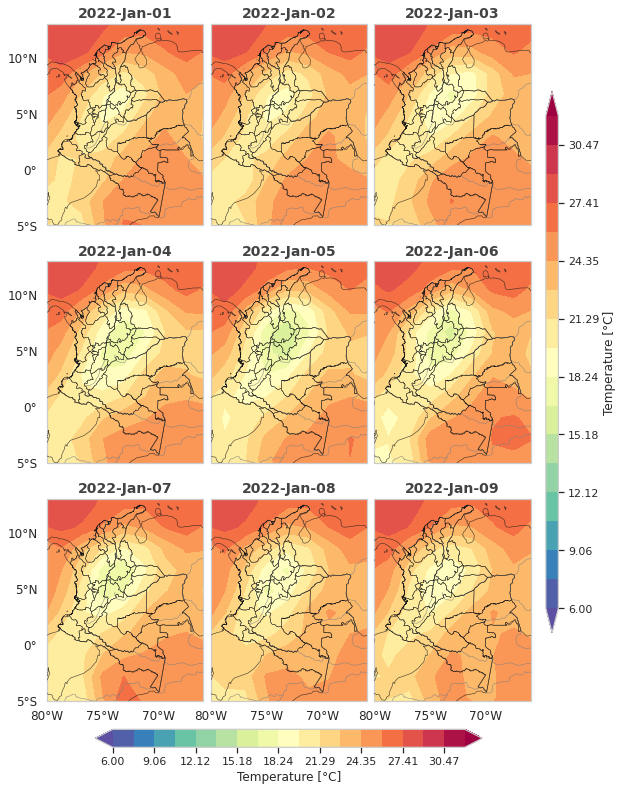

In [4]:
# Define the map projection (PlateCarree) and set the image extent
proj = ccrs.PlateCarree(central_longitude=0)
img_extent = (-80, -66, -5, 13)

# Define the grid size (number of rows and columns)
num_rows = 3
num_columns = 3

# Use the function to calculate properties of the grid
grid_prop = x_coords, y_coords, x_fig, y_fig = cgp.define_grid_fig(
    num_rows, num_columns)

# Define font properties for axis labels and title
font_prop = {'fontsize': 12, 'fontweight': 'semibold', 'color': '#434343'}
font_prop_title = {'fontsize': 14,
                    'fontweight': 'semibold', 'color': '#434343'}

# Create a figure with a specified size
fig = plt.figure(figsize=(7, 10))

# Initialize the index for selecting time slices of the temperature data
idx = 0
# Define the contour levels for the temperature plot
levels = np.linspace(6, 32, 18)

# Define the colormap for the plot
cmap = sns.color_palette("Spectral_r", as_cmap=True)

# Loop through each row and column to create a grid of subplots
for fi in range(num_rows):
    for ci in range(num_columns):
        # Add axes to the figure with the calculated properties
        ax = fig.add_axes([x_coords[ci], y_coords[fi],
                            x_fig, y_fig],
                            projection=proj)
        
        # Add geographic features to the plot
        ax = cgp.continentes_lon_lat(ax, map_resolution=50,
                                     departamentos=True, rivers=True,
                                     lon_step=5, lat_step=5)
        # departamentos shapes is added and the lon_step and lat_step are 5°
        # map resolution is set to 50m, [10, 50 and 110] are available

        # Set the image extent and aspect ratio of the plot
        ax.set_extent(img_extent, proj)
        ax.set_aspect('auto')

        # Remove y-axis labels for subplots that aren't in the first column
        if ci > 0:
            ax.set_yticklabels([])

        # Remove x-axis labels for subplots that are not in the last row
        if fi < (num_rows - 1):
            ax.set_xticklabels([])

        # Plot the temperature data for the current time slice
        cs = ax.contourf(lon, lat, var_values[idx, :, :], levels,
                            cmap=cmap, extend='both', transform=proj)

        # Add a title to each subplot
        ax.set_title(f"{time[idx].strftime('%Y-%b-%d')}",
                        fontdict=font_prop_title)

        # Increment the index to move to the next time slice
        idx += 1

# Define the orientation and label of the colorbar
orientation = 'horizontal'
label = 'Temperature [°C]'

# Add a horizontal colorbar to the figure
cgp.add_colorbar(fig=fig, cs=cs, label=label,
                orientation=orientation,
                grid_prop=grid_prop,
                cbar_factor=0.8,
                cbar_width=0.025,
                y_coord_cbar=-0.035)

# Add a vertical colorbar to the figure (optional)
cgp.add_colorbar(fig, cs, label, 'vertical', grid_prop,
                cbar_factor=0.8, cbar_width=0.025)

# Show the figure with all its subplots and colorbars
fig.savefig(f'figures/departamentos.png', dpi=150,
            bbox_inches='tight', transparent=False,
            facecolor='white')

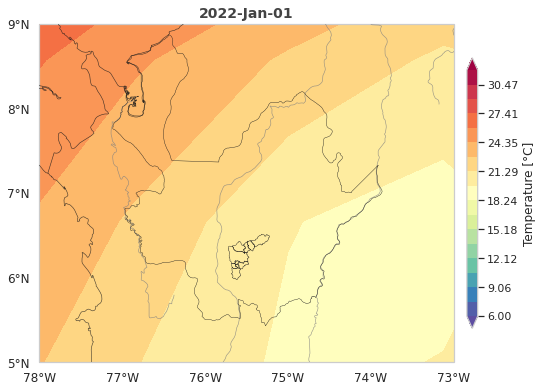

In [5]:
# Define the map projection (PlateCarree) and set the image extent
proj = ccrs.PlateCarree(central_longitude=0)
img_extent = (-78, -73, 5, 9)
num_rows = 1
num_columns = 1

# Use the function to calculate properties of the grid
grid_prop = x_coords, y_coords, x_fig, y_fig = cgp.define_grid_fig(
    num_rows, num_columns)

# Create a figure with a specified size
fig = plt.figure(figsize=(6, 5))

# Initialize the index for selecting time slices of the temperature data
idx = 0
# Define the contour levels for the temperature plot
levels = np.linspace(6, 32, 18)

# Define the colormap for the plot
cmap = sns.color_palette("Spectral_r", as_cmap=True)

# Loop through each row and column to create a grid of subplots
for fi in range(num_rows):
    for ci in range(num_columns):
        # Add axes to the figure with the calculated properties
        ax = fig.add_axes([x_coords[ci], y_coords[fi],
                            x_fig, y_fig],
                            projection=proj)
        # Add geographic features to the plot
        
        # antioquia and amva shapes are added and
        # lon_step and lat_step are 1°
        # map resolution is set to 10m, [10, 50 and 110] are available
        ax = cgp.continentes_lon_lat(ax, amva=True, antioquia=True,
                                     rivers=True, lon_step=1, lat_step=1,
                                     map_resolution=10)

        # Set the image extent and aspect ratio of the plot
        ax.set_extent(img_extent, proj)
        ax.set_aspect('auto')

        # Remove y-axis labels for subplots that aren't in the first column
        if ci > 0:
            ax.set_yticklabels([])

        # Remove x-axis labels for subplots that are not in the last row
        if fi < (num_rows - 1):
            ax.set_xticklabels([])

        # Plot the temperature data for the current time slice
        cs = ax.contourf(lon, lat, var_values[idx, :, :], levels,
                            cmap=cmap, extend='both', transform=proj)

        # Add a title to each subplot
        ax.set_title(f"{time[idx].strftime('%Y-%b-%d')}",
                        fontdict=font_prop_title)

        # Increment the index to move to the next time slice
        idx += 1

# Define the orientation and label of the colorbar
label = 'Temperature [°C]'

# Add a vertical colorbar to the figure (optional)
cgp.add_colorbar(fig, cs, label, 'vertical', grid_prop,
                cbar_factor=0.8, cbar_width=0.025)

fig.savefig(f'figures/amva.png', dpi=150,
            bbox_inches='tight', transparent=False,
            facecolor='white')

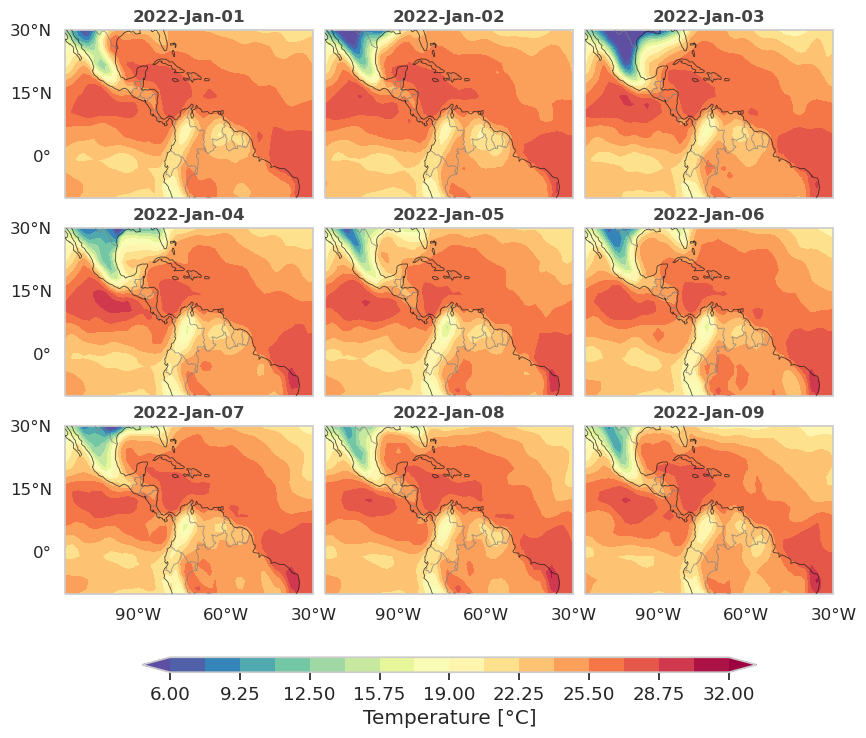

In [3]:
# Define the map projection (PlateCarree) and set the image extent
proj = ccrs.PlateCarree(central_longitude=0)
img_extent = (-115, -30, -10, 30)


# Create a figure with a specified size
fig = plt.figure(figsize=(8, 6))

# Define the grid size (number of rows and columns)
num_rows = 3
num_columns = 3

# Define properties for the grid
horiz_spacing = 0.015
vert_spacing = 0.05

# Use the function to calculate properties of the grid
grid_prop = x_coords, y_coords, x_fig, y_fig = cgp.define_grid_fig(
    num_rows, num_columns,
    horiz_spacing=horiz_spacing, vert_spacing=vert_spacing)

# Define font properties for axis labels and title
font_prop = {'fontsize': 12, 'fontweight': 'semibold', 'color': '#434343'}
font_prop_title = {'fontsize': 12,
                    'fontweight': 'semibold', 'color': '#434343'}


# Initialize the index for selecting time slices of the temperature data
idx = 0
# Define the contour levels for the temperature plot
levels = np.linspace(6, 32, 17)

# Define the colormap for the plot
cmap = sns.color_palette("Spectral_r", as_cmap=True)

# Loop through each row and column to create a grid of subplots
for fi in range(num_rows):
    for ci in range(num_columns):
        # Add axes to the figure with the calculated properties
        ax = fig.add_axes([x_coords[ci], y_coords[fi],
                            x_fig, y_fig],
                            projection=proj)
        # Add geographic features to the plot
        ax = cgp.continentes_lon_lat(ax)

        # Set the image extent and aspect ratio of the plot
        ax.set_extent(img_extent, proj)
        ax.set_aspect('auto')

        # Remove y-axis labels for subplots that aren't in the first column
        if ci > 0:
            ax.set_yticklabels([])

        # Remove x-axis labels for subplots that are not in the last row
        if fi < (num_rows - 1):
            ax.set_xticklabels([])

        # Plot the temperature data for the current time slice
        cs = ax.contourf(lon, lat, var_values[idx, :, :], levels,
                            cmap=cmap, extend='both', transform=proj)

        # Add a title to each subplot
        ax.set_title(f"{time[idx].strftime('%Y-%b-%d')}",
                        fontdict=font_prop_title)

        # Increment the index to move to the next time slice
        idx += 1

# Define the orientation and label of the colorbar
orientation = 'horizontal'
label = 'Temperature [°C]'

# Add a horizontal colorbar to the figure
cgp.add_colorbar(fig=fig, cs=cs, label=label,
                orientation=orientation,
                grid_prop=grid_prop,
                cbar_factor=0.8,
                cbar_width=0.025)

fig.savefig(f'figures/example_1.png', dpi=150,
            bbox_inches='tight', transparent=False,
            facecolor='white')

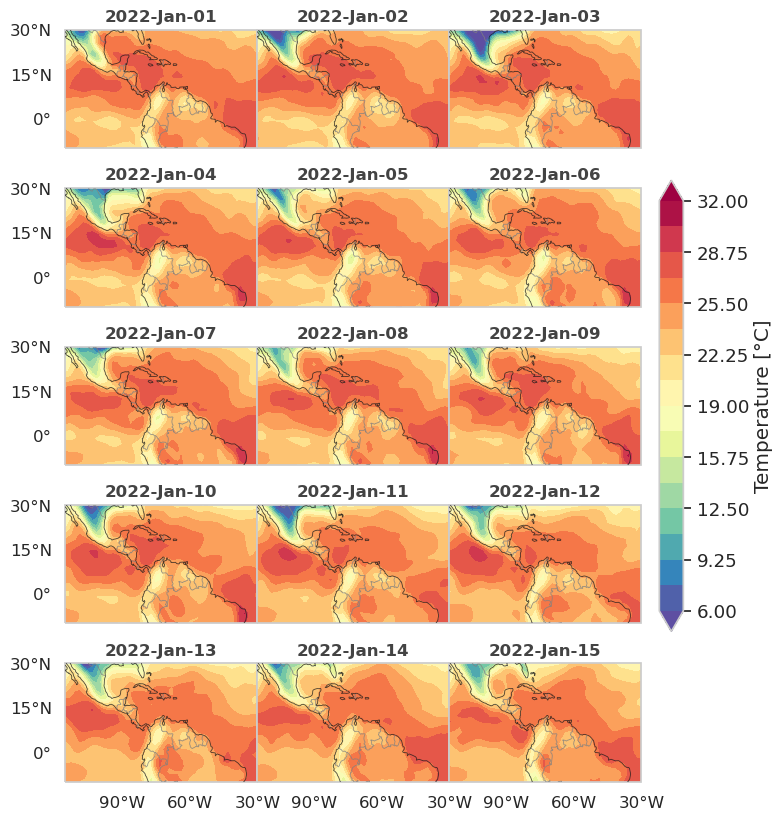

In [4]:
# Define the map projection (PlateCarree) and set the image extent
proj = ccrs.PlateCarree(central_longitude=0)
img_extent = (-115, -30, -10, 30)


# Create a figure with a specified size
fig = plt.figure(figsize=(6, 8))

# Define the grid size (number of rows and columns)
num_rows = 5
num_columns = 3
# Define properties for the grid
horiz_spacing = 0.0
vert_spacing = 0.05

# Use the function to calculate properties of the grid
grid_prop = x_coords, y_coords, x_fig, y_fig = cgp.define_grid_fig(
    num_rows, num_columns,
    horiz_spacing=horiz_spacing, vert_spacing=vert_spacing)

# Initialize the index for selecting time slices of the temperature data
idx = 0
# Define the contour levels for the temperature plot
levels = np.linspace(6, 32, 17)

# Define the colormap for the plot
cmap = sns.color_palette("Spectral_r", as_cmap=True)

# Loop through each row and column to create a grid of subplots
for fi in range(num_rows):
    for ci in range(num_columns):
        # Add axes to the figure with the calculated properties
        ax = fig.add_axes([x_coords[ci], y_coords[fi],
                            x_fig, y_fig],
                            projection=proj)
        # Add geographic features to the plot
        ax = cgp.continentes_lon_lat(ax)

        # Set the image extent and aspect ratio of the plot
        ax.set_extent(img_extent, proj)
        ax.set_aspect('auto')

        # Remove y-axis labels for subplots that aren't in the first column
        if ci > 0:
            ax.set_yticklabels([])

        # Remove x-axis labels for subplots that are not in the last row
        if fi < (num_rows - 1):
            ax.set_xticklabels([])

        # Plot the temperature data for the current time slice
        cs = ax.contourf(lon, lat, var_values[idx, :, :], levels,
                            cmap=cmap, extend='both', transform=proj)

        # Add a title to each subplot
        ax.set_title(f"{time[idx].strftime('%Y-%b-%d')}",
                        fontdict=font_prop_title)

        # Increment the index to move to the next time slice
        idx += 1

# Define the orientation and label of the colorbar
orientation = 'vertical'
label = 'Temperature [°C]'

# Add a horizontal colorbar to the figure
cgp.add_colorbar(fig=fig, cs=cs, label=label,
                orientation=orientation,
                grid_prop=grid_prop,
                cbar_factor=0.6,
                cbar_width=0.04)

fig.savefig(f'figures/example_2.png', dpi=150,
            bbox_inches='tight', transparent=False,
            facecolor='white')

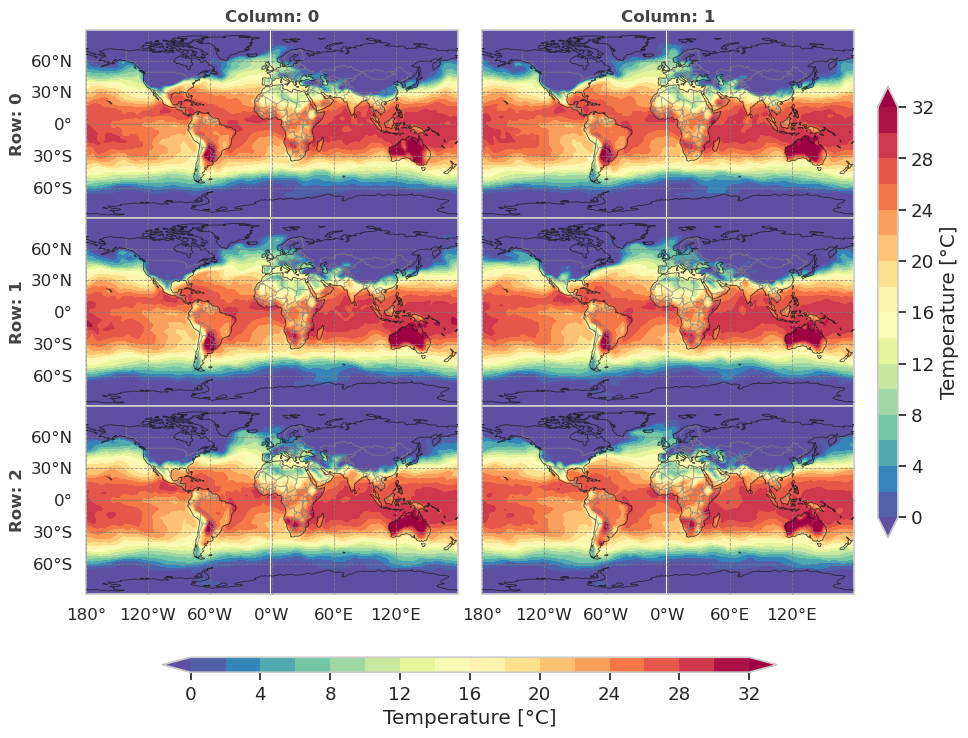

In [5]:
# Define the map projection (PlateCarree) and set the image extent
proj = ccrs.PlateCarree(central_longitude=0)


# Create a figure with a specified size
fig = plt.figure(figsize=(8, 6))

# Define the grid size (number of rows and columns)
num_rows = 3
num_columns = 2

# Define properties for the grid
horiz_spacing = 0.03
vert_spacing = 0.00

# Use the function to calculate properties of the grid
grid_prop = x_coords, y_coords, x_fig, y_fig = cgp.define_grid_fig(
    num_rows, num_columns,
    horiz_spacing=horiz_spacing, vert_spacing=vert_spacing)

# Define font properties for axis labels and title
font_prop = {'fontsize': 12, 'fontweight': 'semibold', 'color': '#434343'}
font_prop_title = {'fontsize': 12,
                    'fontweight': 'semibold', 'color': '#434343'}


# Initialize the index for selecting time slices of the temperature data
idx = 0
# Define the contour levels for the temperature plot
levels = np.linspace(0, 32, 17)

# Define the colormap for the plot
cmap = sns.color_palette("Spectral_r", as_cmap=True)

# Loop through each row and column to create a grid of subplots
for fi in range(num_rows):
    for ci in range(num_columns):
        # Add axes to the figure with the calculated properties
        ax = fig.add_axes([x_coords[ci], y_coords[fi],
                            x_fig, y_fig],
                            projection=proj)
        # Add geographic features to the plot
        ax = cgp.continentes_lon_lat(ax, lon_step=60, lat_step=30)

        # Set the image extent and aspect ratio of the plot
        ax.set_aspect('auto')

        # Remove y-axis labels for subplots that aren't in the first column
        if ci > 0:
            ax.set_yticklabels([])

        # Remove x-axis labels for subplots that are not in the last row
        if fi < (num_rows - 1):
            ax.set_xticklabels([])

        # Plot the temperature data for the current time slice
        cs = ax.contourf(lon, lat, var_values[idx, :, :], levels,
                            cmap=cmap, extend='both', transform=proj)

        if ci == 0:
            plt.ylabel(f'Row: {fi}', fontdict=font_prop_title)
            
            
        if fi == 0:
            plt.title(f'Column: {ci}', fontdict=font_prop_title)

        # Increment the index to move to the next time slice
        idx += 1

# Define the orientation and label of the colorbar
orientation = 'vertical'
label = 'Temperature [°C]'

# Add a vertical colorbar to the figure
cgp.add_colorbar(fig=fig, cs=cs, label=label,
                orientation=orientation,
                grid_prop=grid_prop,
                cbar_factor=0.8,
                cbar_width=0.025)


# Add a additional horizontal colorbar to the figure (if needed)
cgp.add_colorbar(fig=fig, cs=cs, label=label,
                orientation='horizontal',
                grid_prop=grid_prop,
                cbar_factor=0.8,
                cbar_width=0.025)


fig.savefig(f'figures/example_0.png', dpi=150,
            bbox_inches='tight', transparent=False,
            facecolor='white')

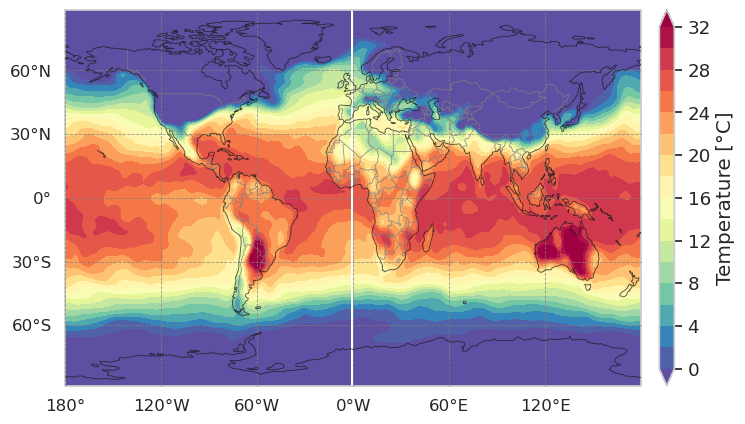

In [6]:
# Define the map projection (PlateCarree) and set the image extent
proj = ccrs.PlateCarree(central_longitude=0)


# Create a figure with a specified size
fig = plt.figure(figsize=(6, 4))

# Define the grid size (number of rows and columns)
num_rows = 1
num_columns = 1

# Define properties for the grid
horiz_spacing = 0.03
vert_spacing = 0.00

# Use the function to calculate properties of the grid
grid_prop = x_coords, y_coords, x_fig, y_fig = cgp.define_grid_fig(
    num_rows, num_columns,
    horiz_spacing=horiz_spacing, vert_spacing=vert_spacing)

# Define font properties for axis labels and title
font_prop = {'fontsize': 12, 'fontweight': 'semibold', 'color': '#434343'}
font_prop_title = {'fontsize': 12,
                    'fontweight': 'semibold', 'color': '#434343'}


# Initialize the index for selecting time slices of the temperature data
idx = 0
# Define the contour levels for the temperature plot
levels = np.linspace(0, 32, 17)

# Define the colormap for the plot
cmap = sns.color_palette("Spectral_r", as_cmap=True)

# Loop through each row and column to create a grid of subplots
for fi in range(num_rows):
    for ci in range(num_columns):
        # Add axes to the figure with the calculated properties
        ax = fig.add_axes([x_coords[ci], y_coords[fi],
                            x_fig, y_fig],
                            projection=proj)
        # Add geographic features to the plot
        ax = cgp.continentes_lon_lat(ax, lon_step=60, lat_step=30)

        # Set the image extent and aspect ratio of the plot
        ax.set_aspect('auto')

        # Remove y-axis labels for subplots that aren't in the first column
        if ci > 0:
            ax.set_yticklabels([])

        # Remove x-axis labels for subplots that are not in the last row
        if fi < (num_rows - 1):
            ax.set_xticklabels([])

        # Plot the temperature data for the current time slice
        cs = ax.contourf(lon, lat, var_values[idx, :, :], levels,
                            cmap=cmap, extend='both', transform=proj)

        # Increment the index to move to the next time slice
        idx += 1

# Define the orientation and label of the colorbar
orientation = 'vertical'
label = 'Temperature [°C]'

# Add a vertical colorbar to the figure
cgp.add_colorbar(fig=fig, cs=cs, label=label,
                orientation=orientation,
                grid_prop=grid_prop,
                cbar_factor=1,
                cbar_width=0.025)


fig.savefig(f'figures/example_4.png', dpi=150,
            bbox_inches='tight', transparent=False,
            facecolor='white')